In [86]:
import os
import PIL.Image as Image
import base64
import io
import numpy as np
import torch
import torchvision
import json
import requests
from urllib.parse import urlencode
from k12libs.utils.nb_easy import k12ai_get_top_dir, RACEURL

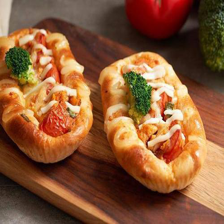

In [2]:
test_pic = os.path.join(k12ai_get_top_dir(), 'assets/images', 'garbage_bread.jpeg')
img = Image.open(test_pic)
img.resize((224, 224))

In [4]:
with open(test_pic, 'rb') as fr:
    b4data = base64.b64encode(fr.read()).decode()

## training


```json
{
    "hypers": {
        "optimizer": {
            "class_name": "torch.optim.Adam",
            "params": {
                "lr": 0.001,
                "betas: [0.9, 0.999],
                "weight_decay: 0,
                "amsgrad": false
            },
        },
        "scheduler": {
            "class_name": "torch.lr_scheduler.StepLR",
            "params": {
                "step_size": 30,
                "gamma": 0.1
            }
        },
        "criterion": {
            "class_name": "torch.nn.CrossEntropyLoss",
            "params": {
                "reduction": "mean"
            }
        }
    }
}
```

## inference

In [85]:
model = "Resnet18"
weights = f"/raceai/data/ckpts/rgarbage_{model}.pth"

reqdata = {
    "task": "cls.inference",
    "cfg": {
        "runner": {
        },
        "data": {
            "class_name": "raceai.data.process.Base64DataLoader",  
            "params": {
                "data_source": b4data,
                "dataset": {
                    "class_name": "raceai.data.PredictSingleImageDataset",
                    "params": {
                        "input_size": 224,
                        "mean": [0.6535,0.6132,0.5643],
                        "std": [0.2165,0.2244,0.2416]
                    }
                }
            }
        },
        "model": {
            "class_name": f"raceai.models.backbone.{model}",  
            "params": {
                "device": 'cpu'
                "num_classes": 4,
                "weights": weights
            }
        }
    }
}

uri = f'{RACEURL}/raceai/framework/inference'

resdata = json.loads(requests.post(url=uri, json=reqdata).text)
if 0 != resdata['errno']:
    if 'traceback' in resdata['result']:
        print(resdata['result']['traceback'])
else:
    print(resdata)

{'errno': 0, 'result': [1]}
